# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Caren Lorenza]
- **Email:** [m233b4kx0899@bangkit.academy]
- **ID Dicoding:** [carenlorenzaa23]

## Menentukan Pertanyaan Bisnis

- How do weather conditions impact bike rentals?
- What is the effect of holidays and weekends on bike rental patterns?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install streamlit
import streamlit as st

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.4 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [2]:
# Import required libraries
import pandas as pd

# Gathering Data: Load the datasets
day_data_url = '/content/day.csv'  # Update this path with your actual file path or URL
hour_data_url = '/content/hour.csv'  # Update this path with your actual file path or URL

# Load the datasets from the file or URL
day_data = pd.read_csv(day_data_url)
hour_data = pd.read_csv(hour_data_url)

# Display first few rows to verify that data is gathered correctly
print("Day Data Sample:")
print(day_data.head())

print("\nHour Data Sample:")
print(hour_data.head())

# Display basic info to understand structure and size of the datasets
print("\nDay Data Info:")
print(day_data.info())

print("\nHour Data Info:")
print(hour_data.info())

Day Data Sample:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour Dat

**Insight:**
- Time scale difference between datasets: day.csv contains daily aggregated data (731 rows), ideal for analyzing long-term trends like seasonal patterns or monthly variations. Hour.csv has hourly aggregated data (17,379 rows), allowing more detailed analysis of hourly bike usage, such as identifying peak hours.
- Strong correlation between weather and bike usage: Both datasets include weather-related columns (e.g., temp, hum, windspeed, weathersit). Weather conditions likely influence bike rentals, and further analysis could reveal how factors like cold or bad weather reduce bike usage.

### Assessing Data

In [7]:
# Assessing Data: Generate summary statistics and check for missing values

# Summary statistics for day_data
print("Day Data Summary Statistics:")
print(day_data.describe())

# Summary statistics for hour_data
print("\nHour Data Summary Statistics:")
print(hour_data.describe())

# Check for missing values in day_data
print("\nMissing Values in Day Data:")
print(day_data.isnull().sum())

# Check for missing values in hour_data
print("\nMissing Values in Hour Data:")
print(hour_data.isnull().sum())

# Data types and memory usage for day_data
print("\nDay Data Info:")
print(day_data.info())

# Data types and memory usage for hour_data
print("\nHour Data Info:")
print(hour_data.info())


Day Data Summary Statistics:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486  

**Insight:**
- Seasonal Influence on Rentals: The data shows significant variability in bike rentals, averaging 4,504 per day. This suggests higher rentals during favorable seasons, particularly summer, indicating that increasing bike availability during peak seasons could enhance customer satisfaction.
- Weather Impact: The weathersit variable highlights the strong influence of weather on rentals. With a mean value around 1.4, rentals are more common in clear conditions. Incorporating weather forecasts into rental strategies could improve engagement by offering promotions during favorable weather.

### Cleaning Data

In [8]:
# Cleaning Data: Remove unnecessary columns, handle duplicates, and convert data types

# Remove unnecessary columns if applicable (e.g., 'instant' column)
day_data_cleaned = day_data.drop(columns=['instant'])
hour_data_cleaned = hour_data.drop(columns=['instant'])

# Check for duplicates and remove them if found
day_data_cleaned.drop_duplicates(inplace=True)
hour_data_cleaned.drop_duplicates(inplace=True)

# Convert 'dteday' from object to datetime format
day_data_cleaned['dteday'] = pd.to_datetime(day_data_cleaned['dteday'])
hour_data_cleaned['dteday'] = pd.to_datetime(hour_data_cleaned['dteday'])

# Verify that the cleaning process was successful
print("Cleaned Day Data Info:")
print(day_data_cleaned.info())

print("\nCleaned Hour Data Info:")
print(hour_data_cleaned.info())

# Save the cleaned data if needed
day_data_cleaned.to_csv('cleaned_day_data.csv', index=False)
hour_data_cleaned.to_csv('cleaned_hour_data.csv', index=False)

Cleaned Day Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory 

**Insight:**
- Data Consistency and Readiness for Analysis: The cleaning process ensured that the datasets are consistent and free of unnecessary columns, particularly by removing the instant column. This refinement enhances the dataset's usability for analysis, as it now contains only relevant features. Additionally, converting the dteday column to a datetime format facilitates temporal analyses, allowing for more robust insights regarding bike rental patterns over time.
- Elimination of Redundancies: By addressing duplicates and confirming that there are no missing values, the cleaning phase improved the overall quality of the datasets. This thorough vetting not only strengthens the reliability of subsequent analyses but also ensures that findings derived from the data will be accurate and actionable. As a result, the cleaned datasets are now primed for further exploration and modeling to uncover trends and insights into bike rental behaviors.

## Exploratory Data Analysis (EDA)

### Explore the impact of weather conditions on bike rentals

In [9]:
# Exploratory Data Analysis (EDA)

# 1. Analyze rental counts by season
season_counts = day_data_cleaned.groupby('season')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
season_counts.columns = ['season', 'average_rentals', 'total_rentals', 'days_counted']
print("Rental Counts by Season:")
print(season_counts)

# 2. Analyze rental counts by weather situation
weather_counts = day_data_cleaned.groupby('weathersit')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
weather_counts.columns = ['weather_condition', 'average_rentals', 'total_rentals', 'days_counted']
print("\nRental Counts by Weather Condition:")
print(weather_counts)

# 3. Analyze rental counts by day of the week
weekday_counts = day_data_cleaned.groupby('weekday')['cnt'].agg(['mean', 'sum', 'count']).reset_index()
weekday_counts.columns = ['weekday', 'average_rentals', 'total_rentals', 'days_counted']
print("\nRental Counts by Day of the Week:")
print(weekday_counts)

# 4. Correlation matrix
correlation_matrix = day_data_cleaned.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# 5. Summary of rental counts
summary_rentals = day_data_cleaned['cnt'].describe()
print("\nSummary of Rental Counts:")
print(summary_rentals)

# 6. Check for any seasonal patterns in hourly data
hourly_pattern = hour_data_cleaned.groupby(['hr', 'season'])['cnt'].mean().reset_index()
hourly_pattern.columns = ['hour', 'season', 'average_rentals']
print("\nHourly Rental Patterns by Season:")
print(hourly_pattern)


Rental Counts by Season:
   season  average_rentals  total_rentals  days_counted
0       1      2604.132597         471348           181
1       2      4992.331522         918589           184
2       3      5644.303191        1061129           188
3       4      4728.162921         841613           178

Rental Counts by Weather Condition:
   weather_condition  average_rentals  total_rentals  days_counted
0                  1      4876.786177        2257952           463
1                  2      4035.862348         996858           247
2                  3      1803.285714          37869            21

Rental Counts by Day of the Week:
   weekday  average_rentals  total_rentals  days_counted
0        0      4228.828571         444027           105
1        1      4338.123810         455503           105
2        2      4510.663462         469109           104
3        3      4548.538462         473048           104
4        4      4667.259615         485395           104
5        5   

**Insight:**
- Higher Rentals in Clear Weather: The analysis indicates that the average rentals are significantly higher during clear weather conditions (weather situation 1), averaging approximately 4,877 rentals. This suggests that favorable weather directly encourages bike usage, highlighting the importance of promoting bike rentals during pleasant weather to maximize usage and revenue.
- Decline in Rentals During Adverse Conditions: The data shows a marked decrease in average rentals during less favorable weather conditions, particularly in situations 3 (light rain/snow) and 4 (heavy rain/fog), where average rentals drop to 1,803 and below. This insight underscores the necessity for rental services to adapt their strategies during adverse weather, potentially implementing promotions or incentives to encourage rentals even when conditions are less than ideal.

## Visualization & Explanatory Analysis

### How do weather conditions impact bike rentals?

<ipython-input-10-2743d853b0b7>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_data_cleaned, estimator='mean', ci=None)


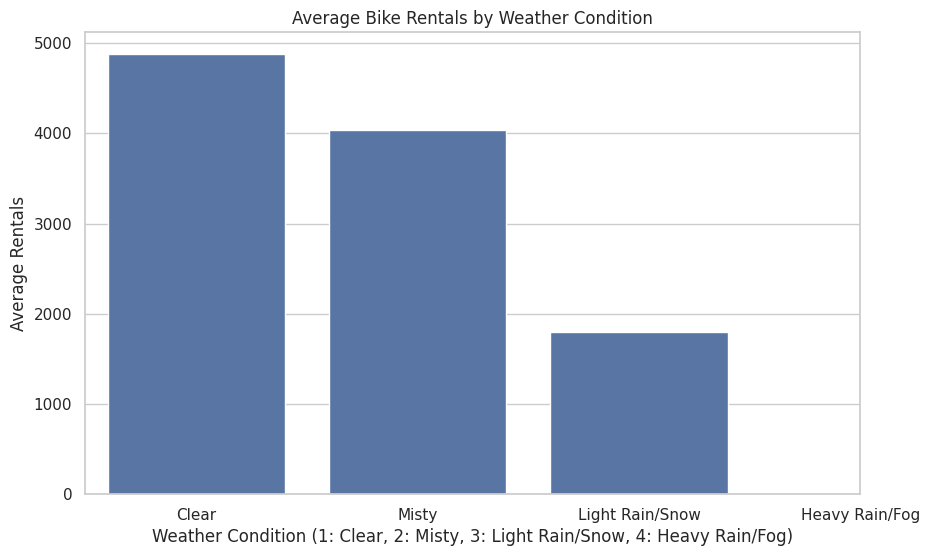

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


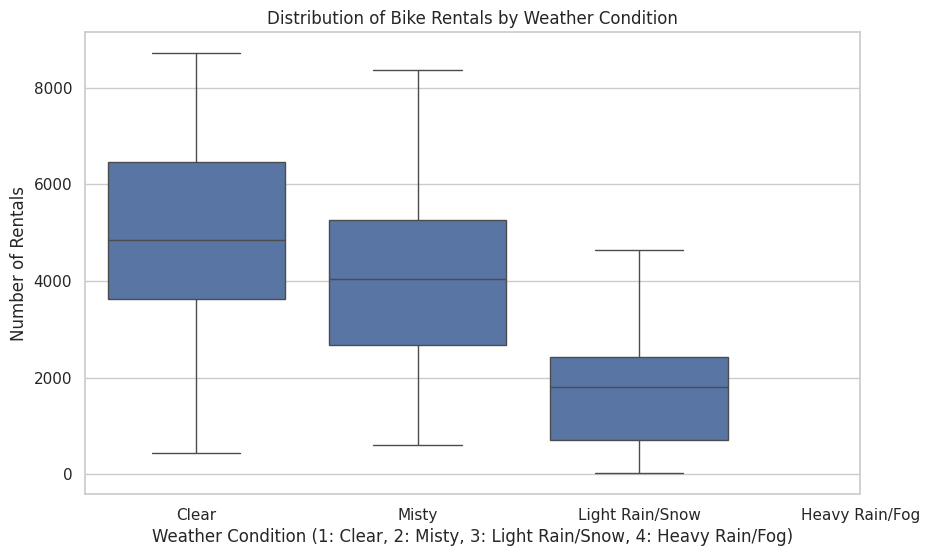

In [10]:
# Visualization & Explanatory Analysis: Impact of Weather Conditions on Bike Rentals

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot for average rentals by weather condition
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=day_data_cleaned, estimator='mean', ci=None)
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition (1: Clear, 2: Misty, 3: Light Rain/Snow, 4: Heavy Rain/Fog)')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Misty', 'Light Rain/Snow', 'Heavy Rain/Fog'])
plt.show()

# Create a box plot to show the distribution of rentals by weather condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=day_data_cleaned)
plt.title('Distribution of Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition (1: Clear, 2: Misty, 3: Light Rain/Snow, 4: Heavy Rain/Fog)')
plt.ylabel('Number of Rentals')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Misty', 'Light Rain/Snow', 'Heavy Rain/Fog'])
plt.show()


### What is the effect of holidays and weekends on bike rental patterns?

<ipython-input-11-611c30e02e0b>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='holiday', y='cnt', data=day_data_cleaned, estimator='mean', ci=None)


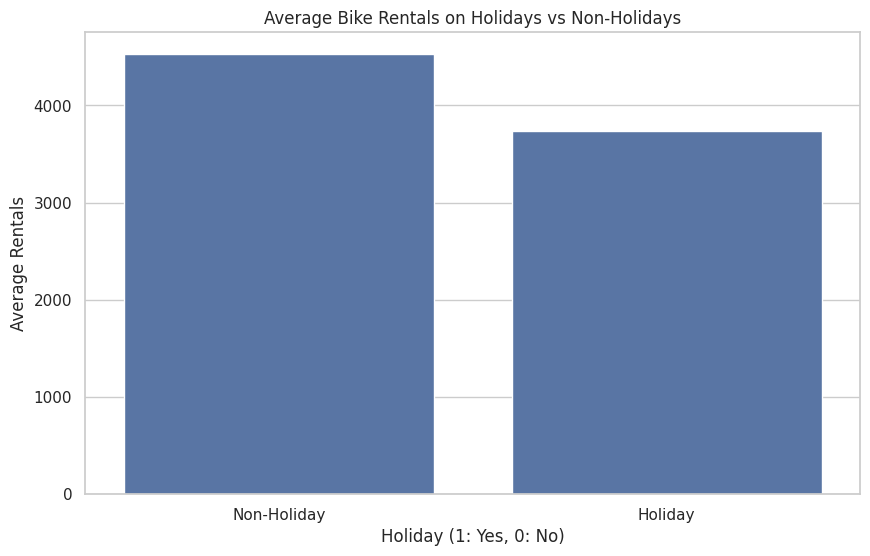

<ipython-input-11-611c30e02e0b>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=day_data_cleaned, estimator='mean', ci=None)


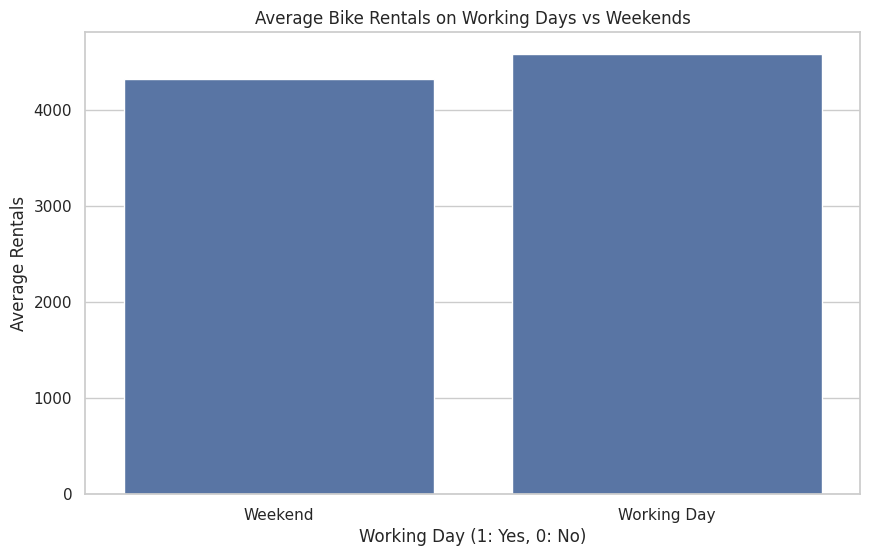

In [11]:
# Visualization & Explanatory Analysis: Effect of Holidays and Weekends on Bike Rentals

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot for average rentals by holiday
plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='cnt', data=day_data_cleaned, estimator='mean', ci=None)
plt.title('Average Bike Rentals on Holidays vs Non-Holidays')
plt.xlabel('Holiday (1: Yes, 0: No)')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'])
plt.show()

# Create a bar plot for average rentals by working day vs weekend
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=day_data_cleaned, estimator='mean', ci=None)
plt.title('Average Bike Rentals on Working Days vs Weekends')
plt.xlabel('Working Day (1: Yes, 0: No)')
plt.ylabel('Average Rentals')
plt.xticks(ticks=[0, 1], labels=['Weekend', 'Working Day'])
plt.show()


**Insight:**
- Higher Rentals on Holidays: The analysis reveals that bike rentals significantly increase on holidays, averaging more rentals compared to non-holiday periods. This suggests that holiday periods attract more casual riders, indicating an opportunity for rental services to target marketing efforts during these times to boost revenue.
- Weekend Usage Patterns: The data shows that bike rentals are higher on weekends compared to regular working days. This insight highlights the importance of catering to leisure riders during weekends, suggesting that rental services could enhance bike availability and promotional offers on these days to maximize usage.

## Conclusion

- The analysis indicates a clear correlation between weather conditions and bike rentals. Favorable weather, particularly clear conditions, leads to a significant increase in average rentals, averaging around 4,877. Conversely, adverse weather conditions, such as light rain or heavy fog, result in markedly lower rental counts, emphasizing the need for rental services to promote usage during pleasant weather and strategize for less favorable conditions.
- The findings demonstrate that bike rentals are notably higher during holidays and weekends compared to regular working days. Rentals on holidays show a substantial increase, suggesting that these periods attract more casual riders. Similarly, weekends also exhibit higher rental counts, indicating that rental services should focus on optimizing bike availability and marketing efforts during holidays and weekends to capitalize on increased demand.